In [5]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from itertools import cycle, islice
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
import seaborn as sns
from collections import Counter
import plotly.express as px
from math import pi
import pygal

In [6]:
cleansed="cleansed_df.csv"
audiofeature_path = "audiofeatures_df.csv"
master="master.csv"
audiofeature_dataframe = pd.read_csv(audiofeature_path)
cleansed_df=pd.read_csv(cleansed)
audiofeature_dataframe.head()


,Genre,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,31.770000,-10.109200,119.453410,236517.440000,0.417889,4.920000,0.049715,0.043706,0.384144,0.549900
1,afrobeat,11.490000,-7.940680,119.634750,291627.600000,0.670631,5.700000,0.081000,0.078462,0.734760,0.659280
2,alt-rock,28.150000,-7.046410,128.581140,242760.980000,0.744190,5.060000,0.085210,0.053519,0.470889,0.469367
3,alternative,45.842105,-5.941326,120.900768,231153.905263,0.766053,5.621053,0.048122,0.050540,0.494327,0.530789
4,ambient,18.400000,-19.527770,110.091350,328447.300000,0.260270,4.450000,0.792598,0.045212,0.121041,0.299040


In [7]:
#Track duration - convert milisecond to second
duration_ms_list = audiofeature_dataframe['Duration_ms'].tolist()
duration_ms_list
Int = 1000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
#duration_s_list

/Users/williamforsyth/anaconda3/envs/PythonDataViz/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


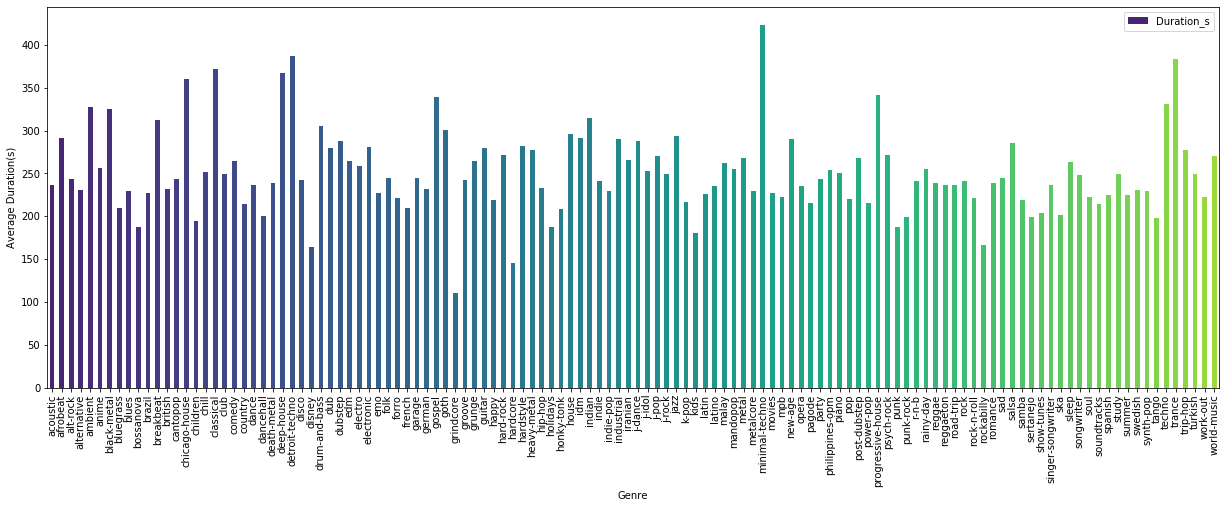

In [8]:
#Make a bargraph of track duration
genre_duration = audiofeature_dataframe[["Genre","Duration_ms"]]
genre_duration['Duration_s']= duration_s_list
genre_duration_s = genre_duration[["Genre","Duration_s"]]
color = cm.viridis(np.linspace(0.1, 0.9, 130))
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Average Duration(s)")
plt.show
plt.savefig("outputs/Average_duration_bar_graph.png")



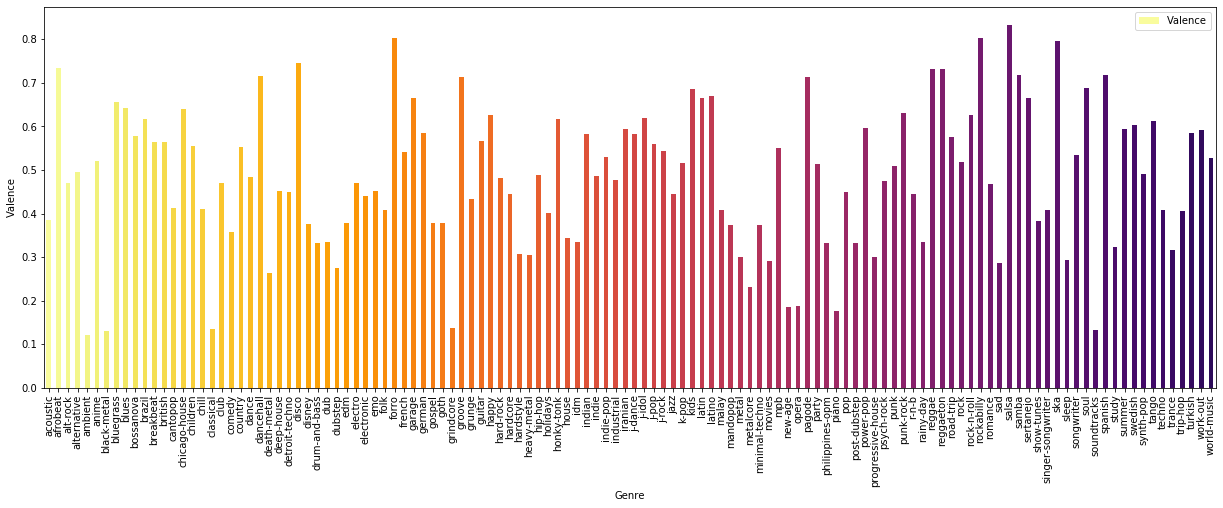

In [9]:
genre_population=audiofeature_dataframe[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show
plt.savefig("outputs/Average_Valence_bar_graph.png")

In [10]:
#Define function for simple linear regression
def reg(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    
#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    plt.savefig(f"outputs/regress{d}_{i}.png")
    plt.show()

In [11]:
#Define function for scatter
def scatter(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    plt.scatter(x,y)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    plt.savefig(f"outputs/scatter{d}_{i}.png")

    plt.show()

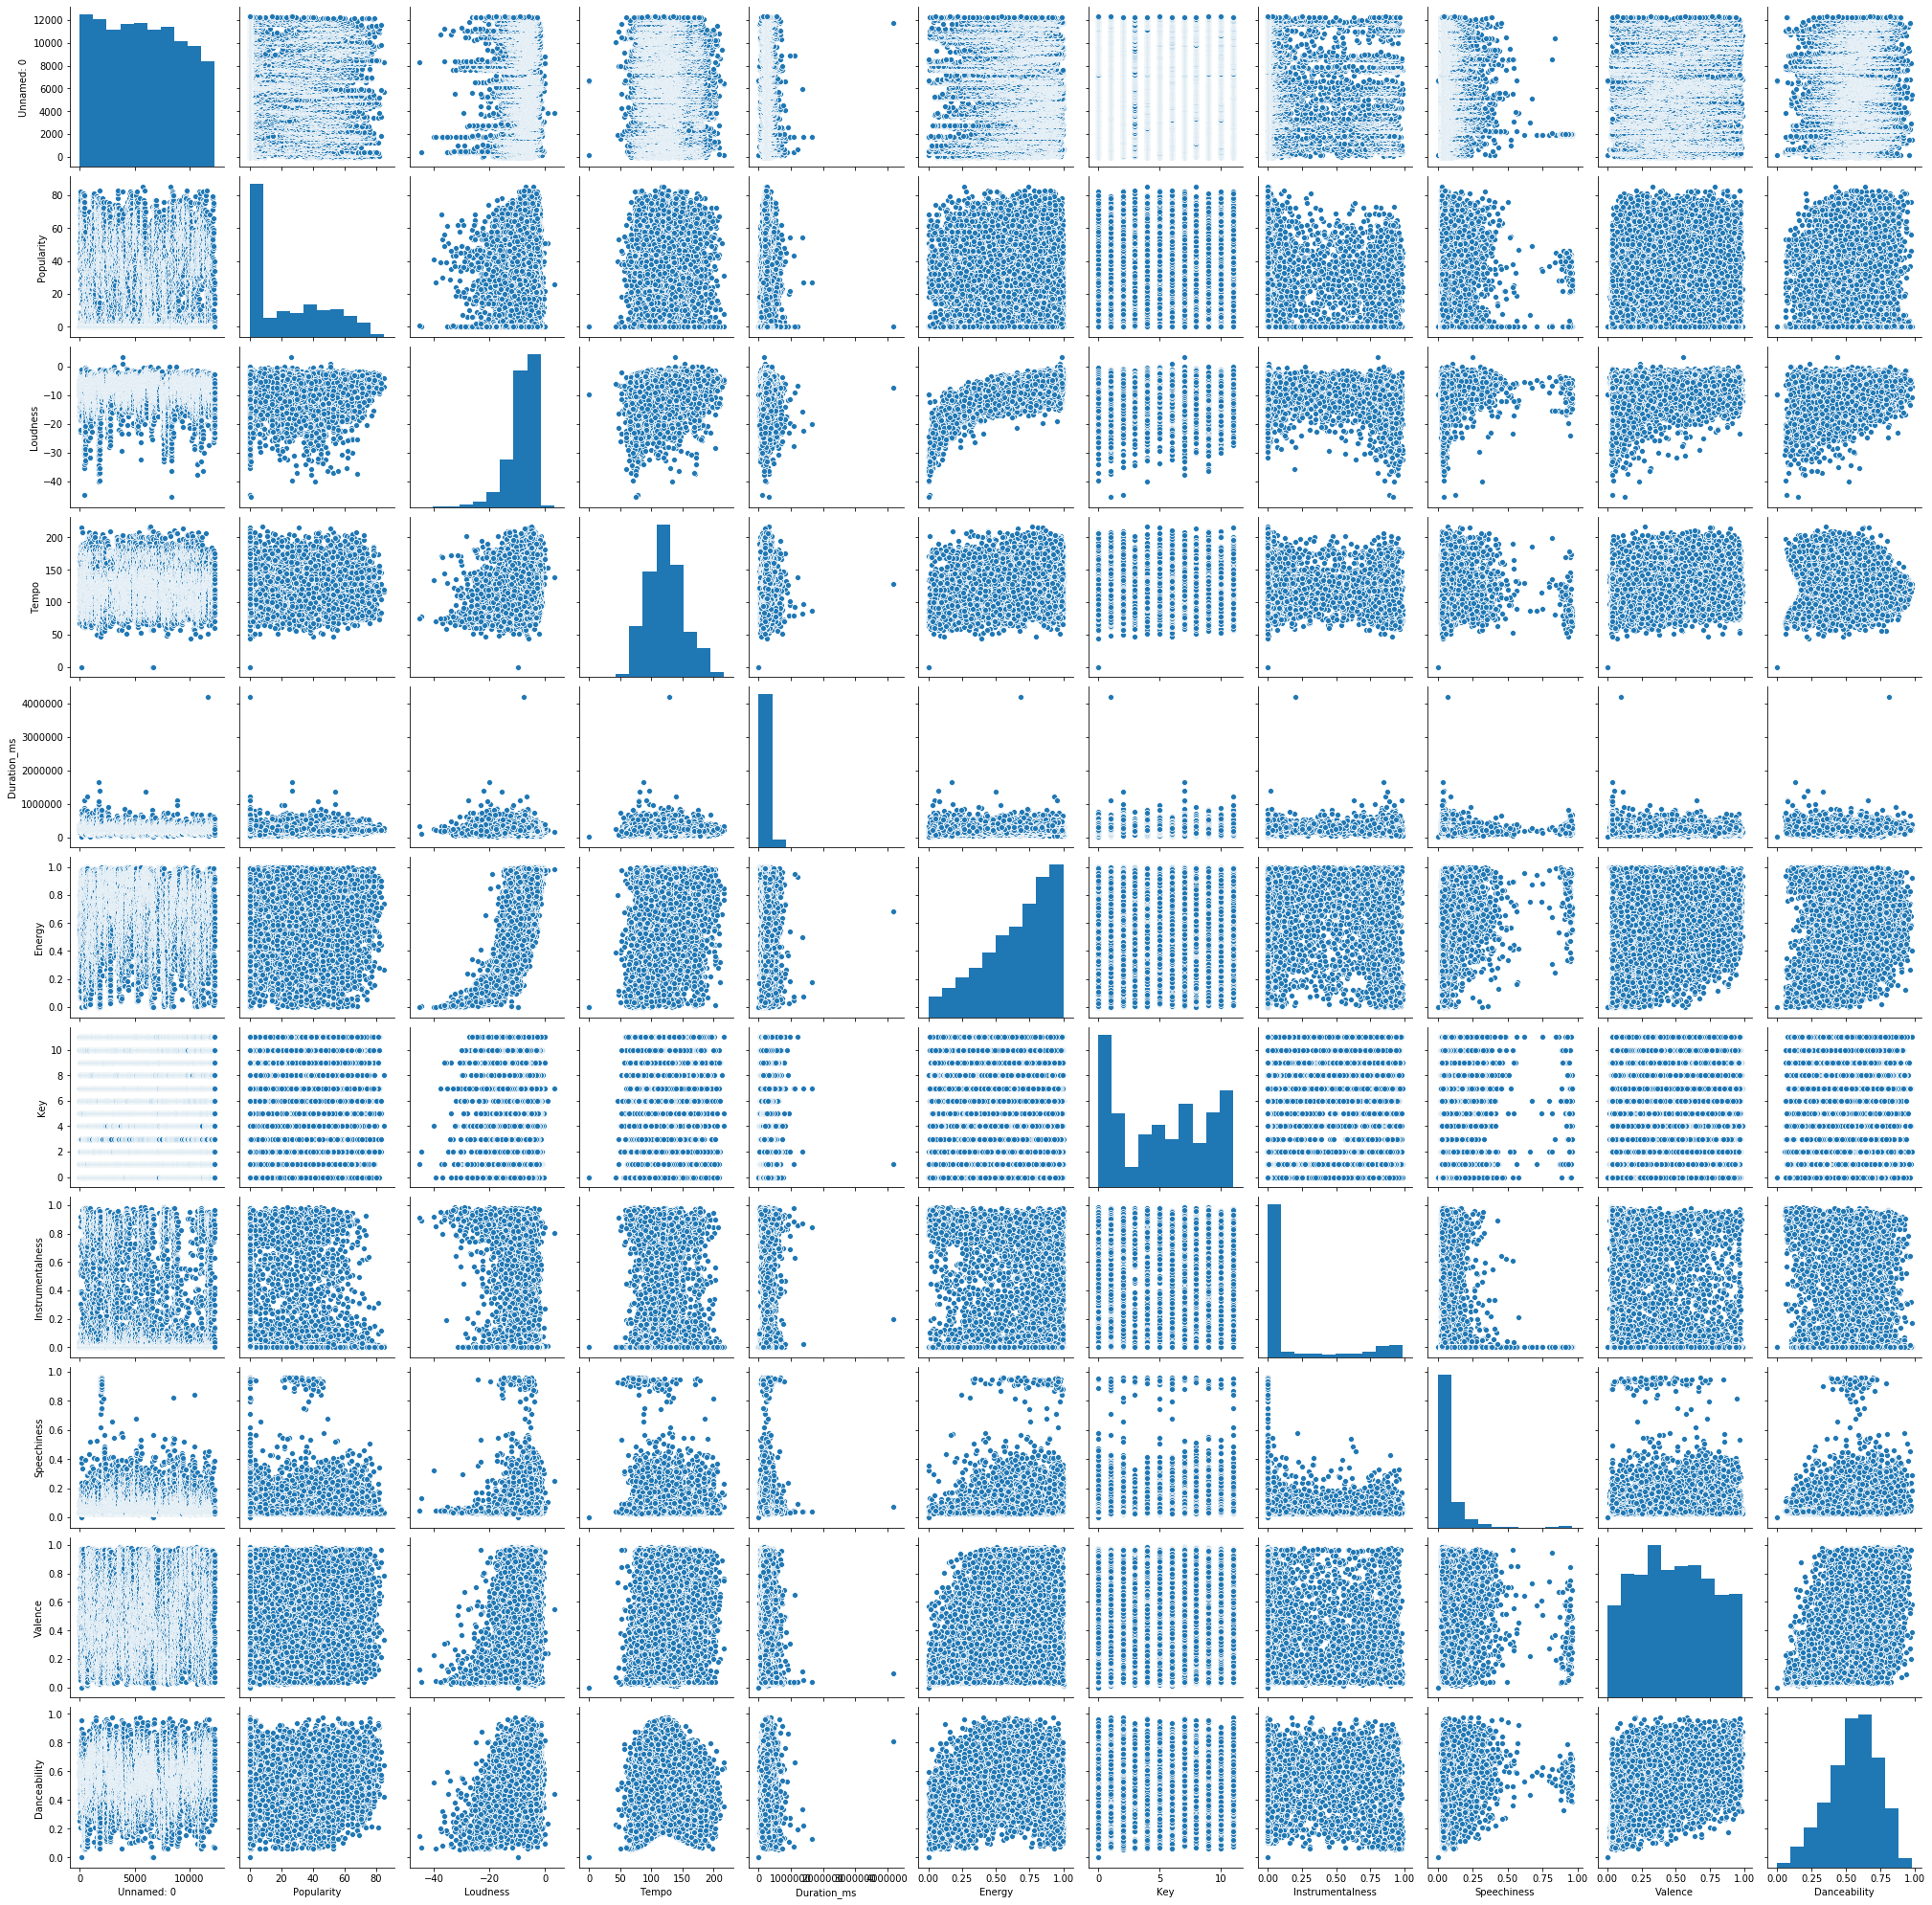

In [12]:
sns.pairplot(cleansed_df)
plt.savefig("all_scatters.png")

In [13]:
print (cleansed_df.corr())

                  Unnamed: 0  Popularity  Loudness     Tempo  Duration_ms  \
Unnamed: 0          1.000000    0.044041  0.010077 -0.031457    -0.064363   
Popularity          0.044041    1.000000  0.050744 -0.024895    -0.045719   
Loudness            0.010077    0.050744  1.000000  0.204203    -0.062719   
Tempo              -0.031457   -0.024895  0.204203  1.000000     0.002954   
Duration_ms        -0.064363   -0.045719 -0.062719  0.002954     1.000000   
Energy             -0.058306   -0.016070  0.779891  0.247796    -0.010659   
Key                -0.005376   -0.005137  0.038563  0.024982     0.015624   
Instrumentalness   -0.085591   -0.135418 -0.352932 -0.013243     0.246534   
Speechiness        -0.083570    0.005082  0.069459 -0.021806    -0.021040   
Valence             0.072339   -0.006525  0.268497  0.084259    -0.194625   
Danceability        0.061180    0.009656  0.253435 -0.061028     0.007743   

                    Energy       Key  Instrumentalness  Speechiness   Valen

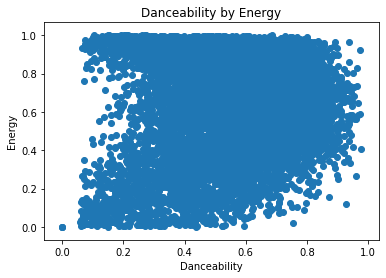

In [14]:
scatter("Danceability","Energy", cleansed_df)

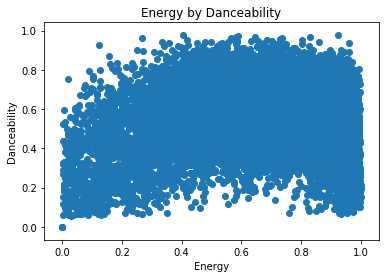

In [15]:
scatter("Energy","Danceability", cleansed_df)

β =[[0.10341216]]
α =[0.48683842]
R^2=0.02165484605517165


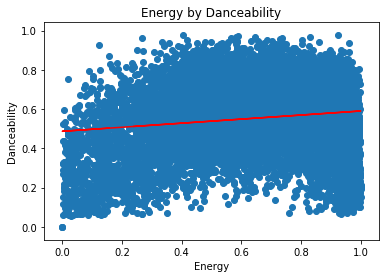

In [16]:
reg("Energy","Danceability", cleansed_df)

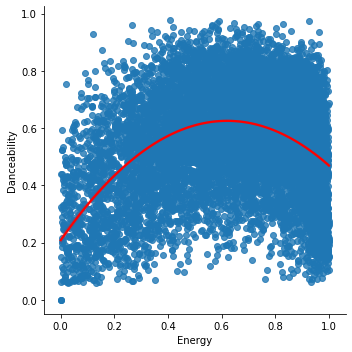

In [17]:
sns.lmplot("Energy","Danceability", cleansed_df, line_kws={'color': 'red'}, order=2)
title="energy_dance_parabola"
plt.savefig(f"outputs/sns{title}.png")

In [18]:
#Generate a list of substantively interesting genres.
#Method: researcher's careful judgment (That's academic language for 
#I made it up. Suggestions for a better list are welcomed.)
substantive_list=["classical","country","electronic","jazz","hip-hop","rock","pop"]

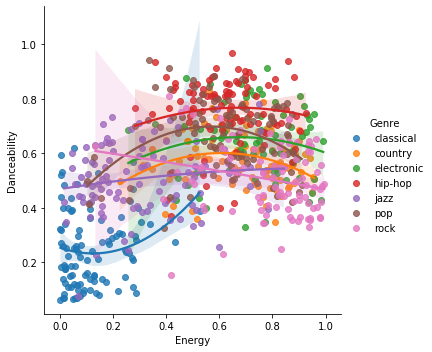

In [19]:
#Compare the relationship for each genre.
#It looks like pop music and rock music have the most "normal" looking relationship.
#We can also see that different genres have very different average energy distributions.

subs_df=cleansed_df.loc[cleansed_df["Genre"].isin(["classical","country","electronic","jazz","hip-hop","rock","pop"])]
sns.lmplot(x="Energy", y="Danceability", data=subs_df ,order=2, hue="Genre")
title="genrelist_parabolas"
plt.savefig(f"outputs/sns{title}.png")

In [20]:
Image(filename="final_energy.PNG")

NameError: name 'Image' is not defined

In [180]:
# List of languages
language_genre_list = ['brazil', 'british', 'cantopop', 'mandopop', 'french', 'german', 'indian', 'iranian', 'malay', 'philippines-opm', 'spanish', 'swedish', 'turkish']
# List containing columns in scope.
audio_features_list = ['Genre', 'Popularity', 'Speechiness', 'Danceability', 'Valence', 'Energy']

# Dropping any Genres that do not appear in my 'language_genre_list'
language_genre_df = audiofeature_dataframe[audiofeature_dataframe['Genre'].isin(language_genre_list)]

# Only leaving those columns, for which I require data from
language_genre_df = language_genre_df[audio_features_list]

# Checking output
language_genre_df

,Genre,Popularity,Speechiness,Danceability,Valence,Energy
10,brazil,28.420000,0.056120,0.599740,0.616890,0.603370
12,british,39.102273,0.057957,0.562920,0.565009,0.712489
13,cantopop,14.300000,0.042326,0.585440,0.412373,0.497590
37,french,13.551020,0.075964,0.557347,0.541735,0.480798
39,german,27.043011,0.085570,0.656817,0.586152,0.724333
56,indian,23.500000,0.069315,0.626300,0.581686,0.654520
60,iranian,21.434343,0.077421,0.569465,0.593281,0.580313
70,malay,15.890000,0.035348,0.500870,0.408999,0.532980
71,mandopop,16.410000,0.038249,0.542970,0.374453,0.513710
81,philippines-opm,10.420000,0.040426,0.490400,0.333065,0.475310


In [181]:
# Turning Valence and Energy (measurement scale = 0.0 - 1.0) into percentages, by multiplying by 100
language_genre_df["Energy"] = language_genre_df["Energy"] * 100
language_genre_df["Valence"] = language_genre_df["Valence"] * 100
language_genre_df["Danceability"] = language_genre_df["Danceability"] * 100
language_genre_df["Speechiness"] = language_genre_df["Speechiness"] * 1000

# Rounding to 2-decimal places.
language_genre_df = language_genre_df.round({"Popularity":2, "Speechiness":2, "Danceability":2, "Valence":2, "Energy":2}) 

# changing Genre name, to avoid ambiguity
language_genre_df.loc[81, 'Genre'] = 'philippines_opm'
      
# Checking output
language_genre_df

,Genre,Popularity,Speechiness,Danceability,Valence,Energy
10,brazil,28.42,56.12,59.97,61.69,60.34
12,british,39.10,57.96,56.29,56.50,71.25
13,cantopop,14.30,42.33,58.54,41.24,49.76
37,french,13.55,75.96,55.73,54.17,48.08
39,german,27.04,85.57,65.68,58.62,72.43
56,indian,23.50,69.32,62.63,58.17,65.45
60,iranian,21.43,77.42,56.95,59.33,58.03
70,malay,15.89,35.35,50.09,40.90,53.30
71,mandopop,16.41,38.25,54.30,37.45,51.37
81,philippines_opm,10.42,40.43,49.04,33.31,47.53


In [191]:
# List to store Genre audio feature values
Genre_data_list =[]
# List containing names of audio features
audio_features = ["Popularity", "Energy", "Valence", "Danceability", "Speechiness"]
  
# Iterate over each row and creating a list of lists, containing genre data
for index, rows in language_genre_df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.Popularity, rows.Speechiness, rows.Danceability, rows.Valence, rows.Energy]
    Genre_data_list.append(my_list)
Genre_data_list

# Dictionary - every key is a country and the values are audio features for tha key / country.
d = dict((country, Genre_data_list[idx]) for idx, country in enumerate(language_genre_list))
d

{'brazil': [28.42, 56.12, 59.97, 61.69, 60.34],
 'british': [39.1, 57.96, 56.29, 56.5, 71.25],
 'cantopop': [14.3, 42.33, 58.54, 41.24, 49.76],
 'mandopop': [13.55, 75.96, 55.73, 54.17, 48.08],
 'french': [27.04, 85.57, 65.68, 58.62, 72.43],
 'german': [23.5, 69.32, 62.63, 58.17, 65.45],
 'indian': [21.43, 77.42, 56.95, 59.33, 58.03],
 'iranian': [15.89, 35.35, 50.09, 40.9, 53.3],
 'malay': [16.41, 38.25, 54.3, 37.45, 51.37],
 'philippines-opm': [10.42, 40.43, 49.04, 33.31, 47.53],
 'spanish': [36.4, 57.26, 66.4, 71.8, 72.2],
 'swedish': [31.88, 76.28, 58.92, 60.34, 68.19],
 'turkish': [26.93, 61.21, 63.62, 58.42, 69.97]}

In [183]:
# Fig w-1 - European Audio Features

# EUROPEAN genres, containing values
french = (d.get('french'))
french = np.concatenate((french,[french[0]]))

german = (d.get('german'))
german = np.concatenate((german,[german[0]]))

spanish = (d.get('spanish'))
spanish = np.concatenate((spanish,[spanish[0]]))

swedish = (d.get('swedish'))
swedish = np.concatenate((swedish,[swedish[0]]))

In [184]:
# Calculating evenly-spaced angel coordinates. Using radians for the polar plot with 2 multipled by np pie
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(french))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [185]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


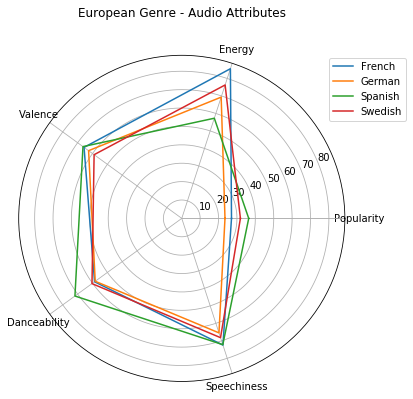

In [186]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, french)
plt.plot(label_placement, german)
plt.plot(label_placement, spanish)
plt.plot(label_placement, swedish)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('European Genre - Audio Attributes', y=1.1)
plt.legend(labels=['French', 'German', 'Spanish', 'Swedish'], loc=(0.95, 0.8))
plt.savefig(f"outputs/European_Genre_Audio_Attributes.png")

In [187]:
# fig w-2 - # Fig w-1 - Asian Audio Features

# Asian Genres lists, containing values
cantopop = (d.get('cantopop'))
cantopop = np.concatenate((cantopop,[cantopop[0]]))

indian = (d.get('indian'))
indian = np.concatenate((indian,[indian[0]]))

iranian = (d.get('iranian'))
iranian = np.concatenate((iranian,[iranian[0]]))

malay = (d.get('malay'))
malay = np.concatenate((malay,[malay[0]]))

mandopop = (d.get('mandopop'))
mandopop = np.concatenate((mandopop,[mandopop[0]]))

philippines_opm = (d.get('philippines-opm'))
philippines_opm = np.concatenate((philippines_opm,[philippines_opm[0]]))

In [188]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cantopop))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [189]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


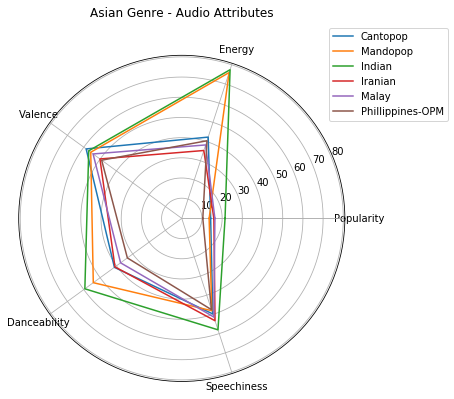

In [190]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, cantopop)
plt.plot(label_placement, mandopop)
plt.plot(label_placement, indian)
plt.plot(label_placement, iranian)
plt.plot(label_placement, malay)
plt.plot(label_placement, philippines_opm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('Asian Genre - Audio Attributes', y=1.1)
plt.legend(labels=['Cantopop', 'Mandopop', 'Indian', 'Iranian', 'Malay', 'Phillippines-OPM'], loc=(0.95, 0.8))
plt.savefig(f"outputs/Asian_Genre_Audio_Attributes.png")